In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Create a sample dataset (simulated data)
data = {
    'Daily_Screen_Time': [3,5,6,2,4,7,8,1,5,9,3,6,2,10,7,4,5,8,9,3,6,7,4,2,8,9,5,3,6,7],
    'Posts_Per_Week': [1,3,4,0,2,6,7,0,3,8,1,5,0,9,6,2,3,7,8,1,4,5,2,1,7,8,4,2,5,6],
    'Avg_Post_Length': [20,55,60,15,30,75,80,10,45,90,22,65,18,95,70,40,50,85,88,25,60,68,33,17,83,90,52,29,67,72],
    'Daily_Online_Hours': [2,4,5,1,3,6,7,1,4,8,2,5,1,9,7,3,4,6,8,2,5,6,3,2,7,8,4,3,6,7],
    'Follower_Count': [100,300,500,80,200,700,900,50,250,1200,150,600,90,1500,800,230,400,950,1100,120,550,700,300,100,950,1100,500,240,720,830],
    'Time_on_Reels(hrs)': [0.5,1.5,2.5,0.2,1.0,2.8,3.0,0.1,1.2,3.5,0.6,2.0,0.3,3.8,2.7,1.0,1.4,2.9,3.3,0.7,2.0,2.4,1.1,0.5,3.1,3.4,1.8,0.9,2.5,2.7],
    'Personality_Type': ['Introvert','Extrovert','Extrovert','Introvert','Introvert','Extrovert','Extrovert','Introvert',
                         'Introvert','Extrovert','Introvert','Extrovert','Introvert','Extrovert','Extrovert','Introvert',
                         'Introvert','Extrovert','Extrovert','Introvert','Extrovert','Extrovert','Introvert','Introvert',
                         'Extrovert','Extrovert','Introvert','Introvert','Extrovert','Extrovert']
}

df = pd.DataFrame(data)
df.head()


,Daily_Screen_Time,Posts_Per_Week,Avg_Post_Length,Daily_Online_Hours,Follower_Count,Time_on_Reels(hrs),Personality_Type
0,3,1,20,2,100,0.5,Introvert
1,5,3,55,4,300,1.5,Extrovert
2,6,4,60,5,500,2.5,Extrovert
3,2,0,15,1,80,0.2,Introvert
4,4,2,30,3,200,1.0,Introvert


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Daily_Screen_Time   30 non-null     int64  
 1   Posts_Per_Week      30 non-null     int64  
 2   Avg_Post_Length     30 non-null     int64  
 3   Daily_Online_Hours  30 non-null     int64  
 4   Follower_Count      30 non-null     int64  
 5   Time_on_Reels(hrs)  30 non-null     float64
 6   Personality_Type    30 non-null     object 
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ KB
None

Summary Statistics:
        Daily_Screen_Time  Posts_Per_Week  Avg_Post_Length  Daily_Online_Hours  \
count          30.000000       30.000000        30.000000           30.000000   
mean            5.466667        4.000000        53.633333            4.633333   
std             2.459792        2.741759        26.629622            2.370557   
min             1.000000        0.000000    

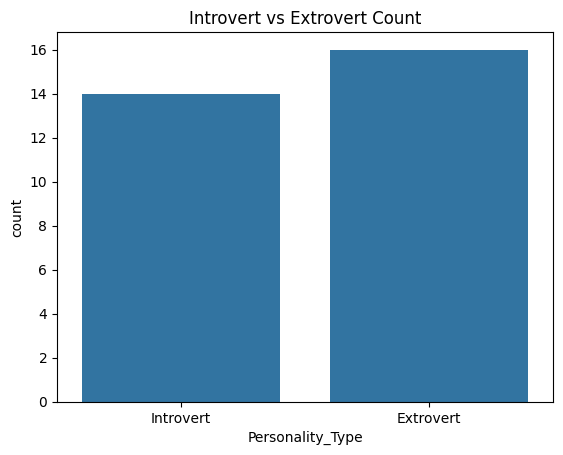

In [ ]:
print(df.info())
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Class distribution
sns.countplot(x='Personality_Type', data=df)
plt.title("Introvert vs Extrovert Count")
plt.show()


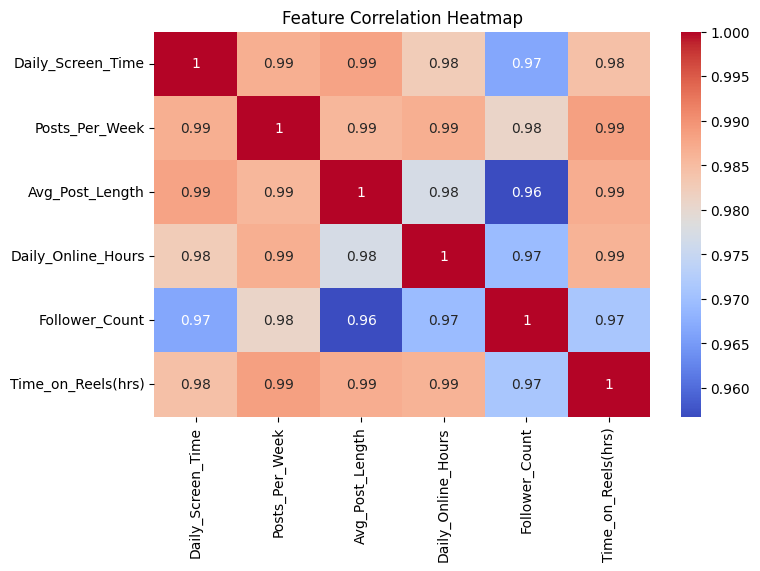

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()




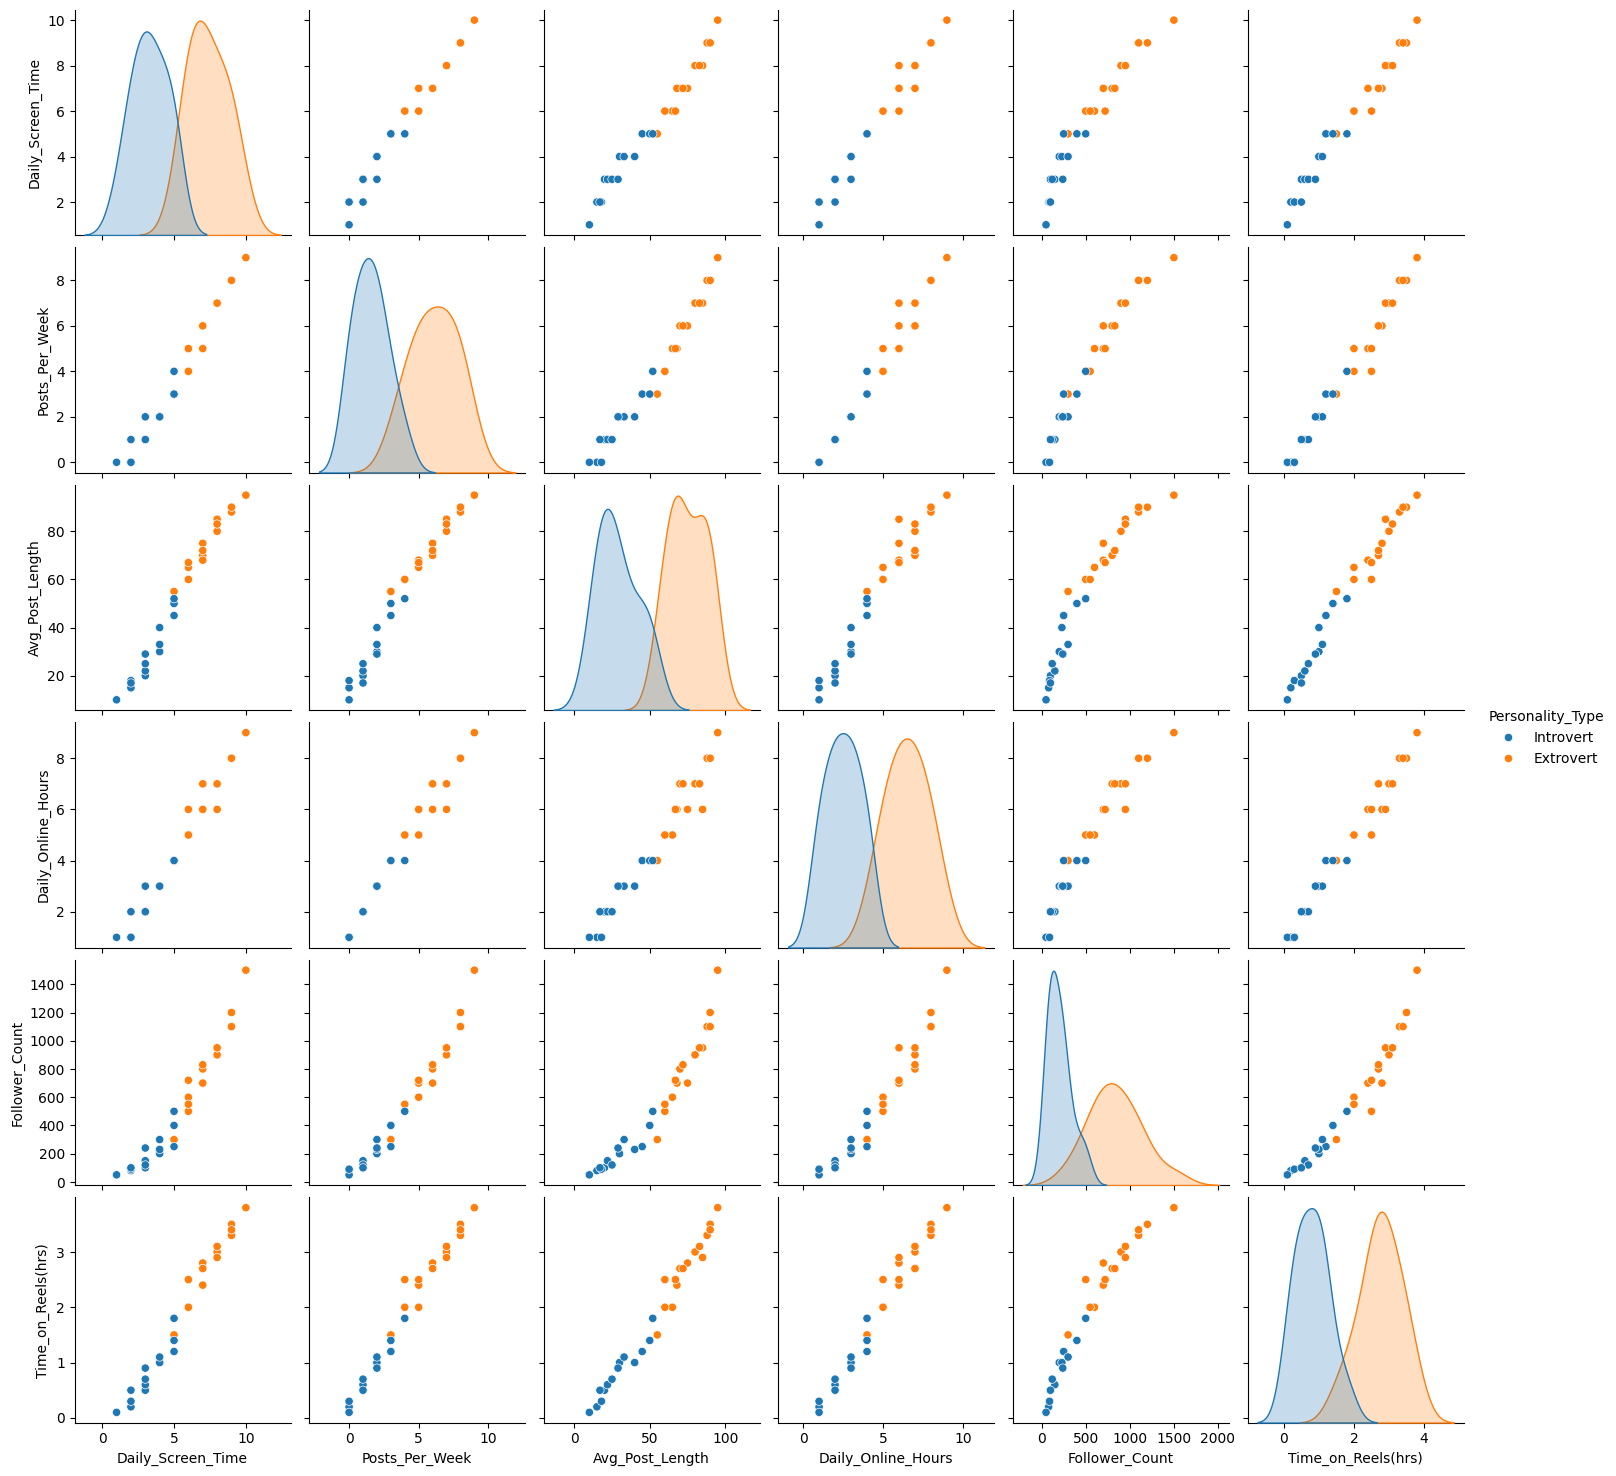

In [ ]:
# Pairplot for some features
sns.pairplot(df, hue='Personality_Type')
plt.show()

In [ ]:
# Encode labels
le = LabelEncoder()
df['Personality_Type'] = le.fit_transform(df['Personality_Type'])  # Introvert=0, Extrovert=1

# Split data
X = df.drop('Personality_Type', axis=1)
y = df['Personality_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
def evaluate_model(name, y_test, y_pred):
    print(f"📊 {name} Model Results")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-"*50)

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)


📊 Logistic Regression Model Results
Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

--------------------------------------------------
📊 Decision Tree Model Results
Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

--------------------------------------------------
📊 Random Forest Model Results
Accu

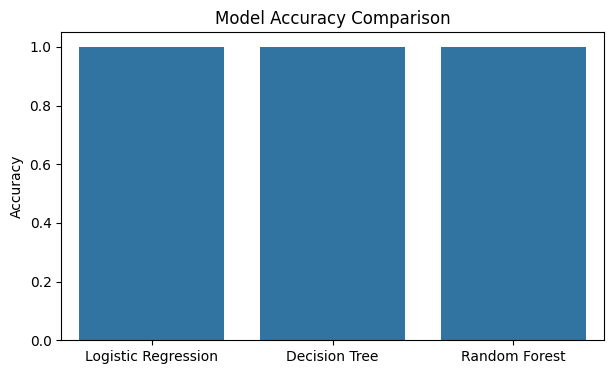

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(7,4))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
